<a href="https://colab.research.google.com/github/Tachawla/Adult-Data-Set/blob/Main/Project2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv ('/content/drive/MyDrive/adult.data', header=None)

In [70]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
df.columns=['Age','Work Class','fnlwt','Education','Education Years','Marital Status','Occupation',
'Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per Week','Native Country','Income']
df.head()

,Age,Work Class,fnlwt,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
df.shape

(32561, 15)

In [73]:
# 1.  The source of data is UC Irvine.  However the data was extracted
# from 1994 Census Database.

# 2.  The data is attributes of a person, such as age, education, family status,
# occupation, gender, race, country of origin, and the money that the person makes
# (less than or equal to $50K or greater).

# 3.  The target is whether the person makes:
# -less than or equal to $50K or
# -greater than $50K.

# 4.  While income is a continuous variable, this dataset has the income in two
# classes.  Hence, it is a binary classification problem.

# 5.  There are 13 features.

# 6.  There are 32560 rows.

#  7.  This seems like a straight-forward dataset, and seems pretty clean so I do
# not forsee any cleaning or modeling issues.


In [74]:
# Data Cleaning
# The 'fnlwt' column is a calculation that was previously performed on the 
# dataset.  I am going to drop this column.
df = df.drop(columns = 'fnlwt')
df.head(2)

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [75]:
# There are some duplicates.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Length: 32561, dtype: bool

In [76]:
df.drop_duplicates(inplace=True)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32554    False
32555    False
32556    False
32558    False
32560    False
Length: 29096, dtype: bool

In [77]:
# Missing Values
df.isnull().sum()
# No missing values

Age                0
Work Class         0
Education          0
Education Years    0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours per Week     0
Native Country     0
Income             0
dtype: int64

In [78]:
# Check for inconsistent labels in categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              29096 non-null  int64 
 1   Work Class       29096 non-null  object
 2   Education        29096 non-null  object
 3   Education Years  29096 non-null  int64 
 4   Marital Status   29096 non-null  object
 5   Occupation       29096 non-null  object
 6   Relationship     29096 non-null  object
 7   Race             29096 non-null  object
 8   Sex              29096 non-null  object
 9   Capital Gain     29096 non-null  int64 
 10  Capital Loss     29096 non-null  int64 
 11  Hours per Week   29096 non-null  int64 
 12  Native Country   29096 non-null  object
 13  Income           29096 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [79]:
# I see a ? in the entry which needs to be cleaned up.
print (df['Work Class'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [80]:
# Locate and clean up the ?
df.loc[df['Work Class'] == '?', :]

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income


In [81]:
print (df['Education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [82]:
print (df['Marital Status'].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [83]:
print (df['Occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [84]:
print (df['Relationship'].unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [85]:
print (df['Race'].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [86]:
print (df['Sex'].unique())

[' Male' ' Female']


In [87]:
# The ? in the entry needs to be cleaned.
print (df['Native Country'].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [89]:
df.loc[df['Native Country'] == '?', :]

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income


In [88]:
# No outliers or problemmatic data
df.describe()

,Age,Education Years,Capital Gain,Capital Loss,Hours per Week
count,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000
mean,39.251340,10.102695,1197.802206,97.175179,40.637820
std,13.687157,2.645194,7778.225220,424.008232,12.735418
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


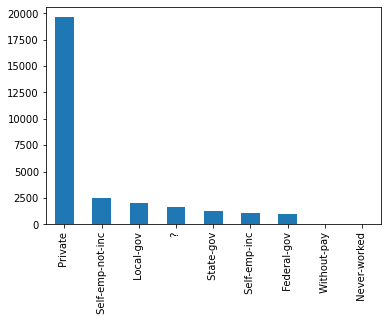

In [90]:
# Univariate visuals
# Plot barchart for categorial features and target
df['Work Class'].value_counts().plot(kind = 'bar')

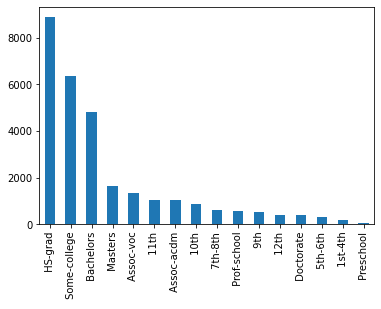

In [91]:
df['Education'].value_counts().plot(kind = 'bar')

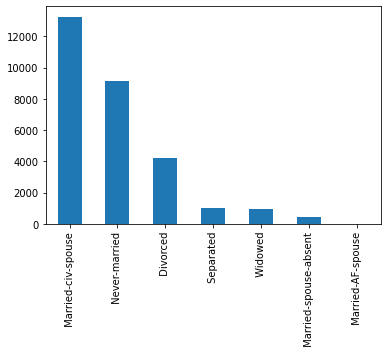

In [92]:
df['Marital Status'].value_counts().plot(kind = 'bar')

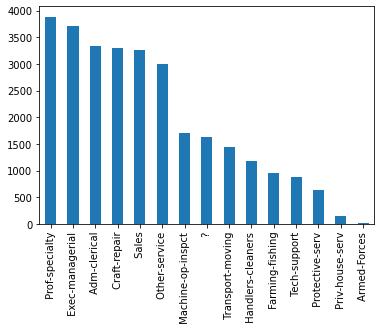

In [93]:
df['Occupation'].value_counts().plot(kind = 'bar')

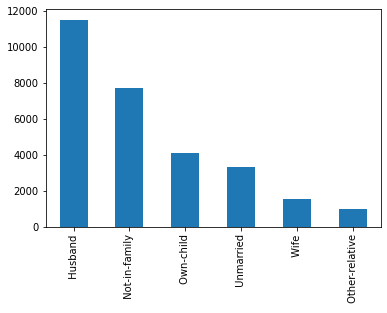

In [94]:
df['Relationship'].value_counts().plot(kind = 'bar')

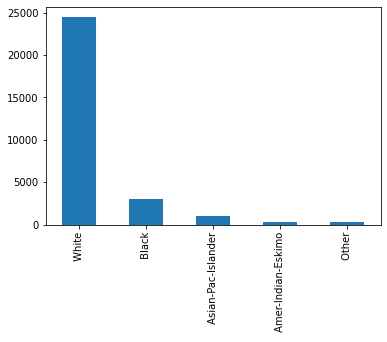

In [95]:
df['Race'].value_counts().plot(kind = 'bar')

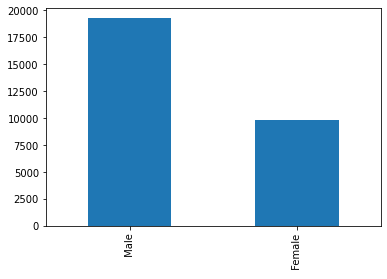

In [96]:
df['Sex'].value_counts().plot(kind = 'bar')

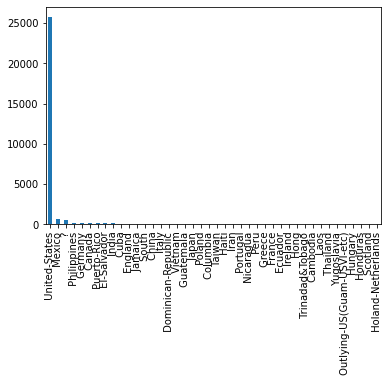

In [97]:
df['Native Country'].value_counts().plot(kind = 'bar')

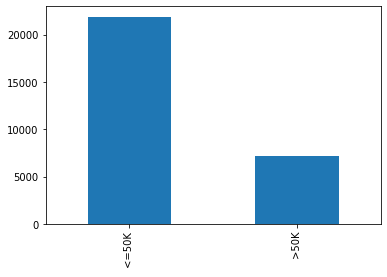

In [98]:
df['Income'].value_counts().plot(kind = 'bar')

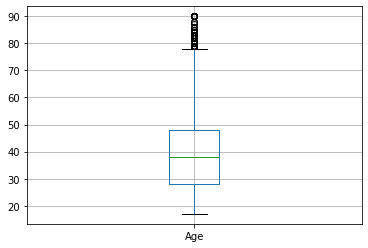

In [99]:
# Plot boxplot for numerical features
df.boxplot(column = 'Age')

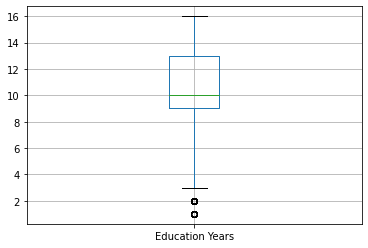

In [100]:
df.boxplot(column = 'Education Years')

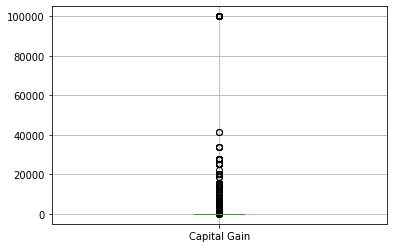

In [101]:
df.boxplot(column = 'Capital Gain')

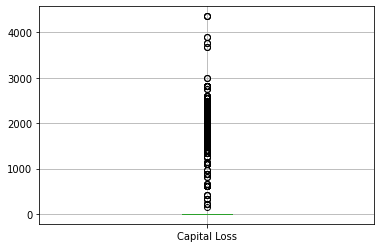

In [102]:
df.boxplot(column = 'Capital Loss')

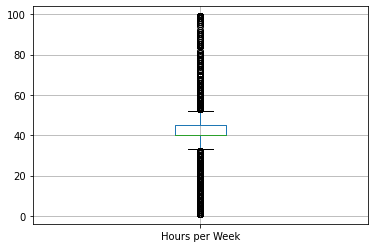

In [103]:
df.boxplot(column = 'Hours per Week')

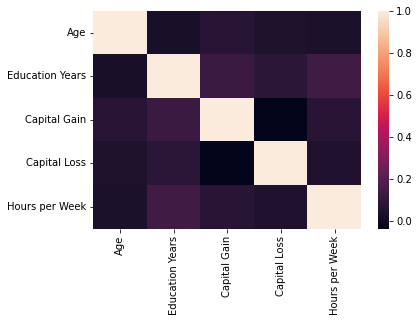

In [107]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
# There is some low correlation between Education Years and Capital Gain
# and Education Years and Hours per Week.  No other moderate/strong correlations
# are found in the plotted features.